In [1]:
from matplotlib import pyplot as plt
import nsmod
import os 
import numpy as np
from numpy import sin, cos, tan
from matplotlib.ticker import MultipleLocator 
%matplotlib inline

%load_ext autoreload
%autoreload 2

from nsmod.switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Model

/usr/lib/python2.7/dist-packages/gtk-2.0/gtk/__init__.py:127: RuntimeWarning: PyOS_InputHook is not available for interactive use of PyGTK
  set_interactive(1)


## Pulse amplitude 

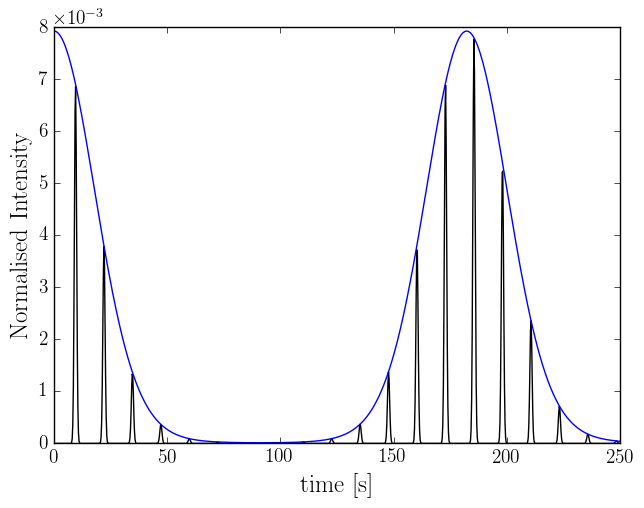

In [14]:
epsI1=0.0
epsI3=7e-2
epsA=0.0
omega0=0.5
error=1e-12
T=250 
chi0 = 85
AnomTorque=True
a0=10.0
upsilon=0.0
n=100000
cleanup=False
PhiO=0
ThetaO= 40
sigmaB=0.2

Phi0 = np.radians(PhiO)
ThetaO = np.radians(ThetaO)

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                     n=1000, error=1e-16, a0=a0, cleanup=True, upsilon=upsilon)
    
ax = Plot.Intensity(file_name, PhiO, ThetaO, sigmaB)
plt.savefig("img/intensity_variation.pdf")
plt.show()

## Cosine and constant

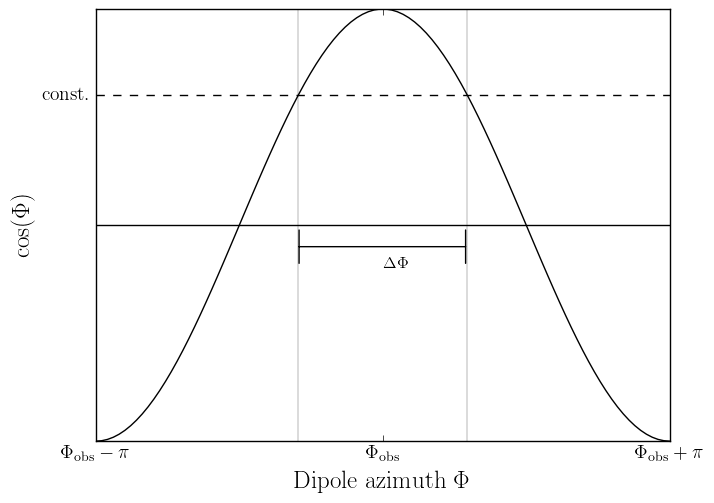

In [3]:
from numpy import pi
ax = plt.subplot(111)

x = np.linspace(-pi, pi, 100)
ax.axhline(0, ls="-", color="k")
ax.plot(x, np.cos(x))
ax.set_xlim(-pi, pi)
ax.set_xticks([-pi, 0, pi])
ax.set_xticklabels(["$\Phi_{\mathrm{obs}} - \pi$", 
                    "$\Phi_{\mathrm{obs}}$",
                    "$\Phi_{\mathrm{obs}} + \pi$"])
k = 0.6
ax.axhline(k, ls="--", color="k")
ax.set_yticks([k])
ax.set_yticklabels(['const.'])

x_fill = np.linspace(np.arccos(k), -np.arccos(k), 100)
#ax.fill_between(x_fill, 0, np.cos(x_fill), color="k", alpha=0.5)

ax.set_xlabel("Dipole azimuth $\Phi$")
ax.set_ylabel("$\cos(\Phi)$")

ax.annotate("",
            xy=(-np.arccos(k)-0.02, -0.1), xycoords='data',
            xytext=(np.arccos(k)+0.01, -0.1), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3"),
            )
ax.annotate("$\Delta\Phi$",
            xy=(0, -0.2), xycoords='data',
            xytext=(0, -0.2), textcoords='data', 
            )

ax.axvline(-np.arccos(k), lw=0.2, color="k")
ax.axvline(np.arccos(k), lw=0.2, color="k")
plt.tight_layout()
plt.savefig("img/CosineIllustration.pdf")
plt.show()

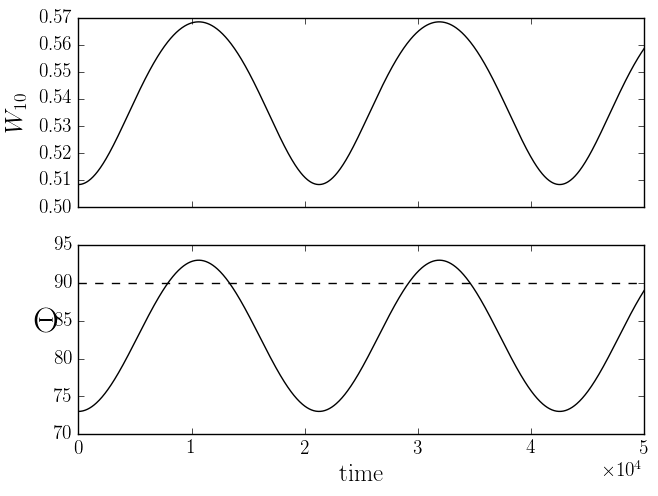

In [17]:
epsI1=0.0
epsI3=3.0e-4
epsA=0.0
omega0=1.
T=5e4
chi0 = 83.0
a0=10
AnomTorque=True
upsilon=0.0
n=100000
cleanup=False,
ThetaO=10
sigmaB = 0.3
eta=0.01

ThetaO = np.radians(ThetaO)

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                     n=1000, error=1e-16, a0=a0, cleanup=True, upsilon=upsilon)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1 = Plot.PulseWidth(file_name, ThetaO, sigmaB , p=10, ls="-", ax=ax1)
ax1.set_xlabel("")
ax2 = Plot.big_theta(file_name, ax=ax2)
ax2.axhline(90, ls="--", color="k")


plt.savefig("img/Pulse_width_modulation_chi90.pdf")
plt.show()

## Comparing precession and switching

### Precession

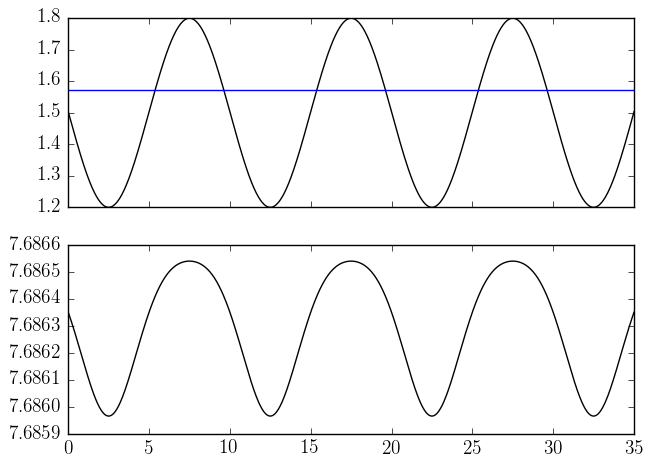

In [5]:
chi = 1.5
theta = 0.3
tauP = 10
P = 1.3e-1
ThetaO = 0.8
sigmaB = 1e-3

time = np.linspace(0, 35, 1000)
psi = 2*np.pi * time/tauP 
Theta = np.arccos(sin(theta) * sin(psi) * sin(chi) + cos(theta) * cos(chi))

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot(time, Theta)
ax1.axhline(np.pi/2)
ax2.plot(time, nsmod.Physics_Functions.Wp(P, Theta, ThetaO, sigmaB), "-")
plt.show()

### Switching

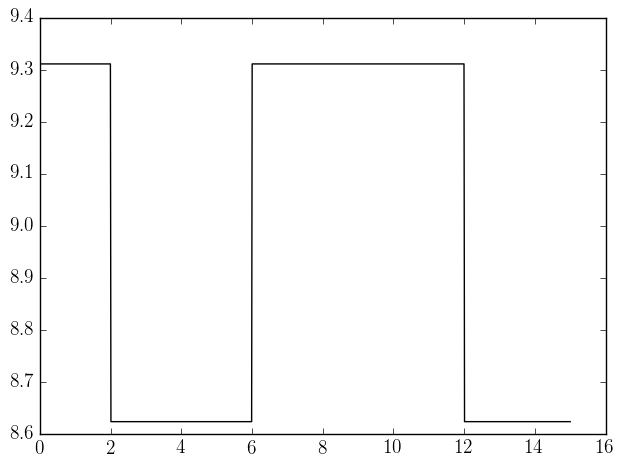

In [6]:
def SignalModel(theta, time):
    WA, WB, T, tAB, tBC, tCD, phi0 = theta
    W = np.zeros(len(time)) + WA

    ti_mod = np.mod(time + phi0*T, T)
    W[(tAB < ti_mod) & (ti_mod < tAB+tBC)] = WB
    W[tAB + tBC + tCD < ti_mod] = WB

    return W


chi = 1.5
theta = 0.1
tauP = 10
P = 1e-1
ThetaO = 1.5
Theta = 1.8
time = np.linspace(0, 15, 1000)

theta = [0.1, 0.2, 10, 2, 4, 5, 0]
sigmaB = SignalModel(theta, time)

fig, ax = plt.subplots(nrows=1, sharex=True)

ax.plot(time, nsmod.Physics_Functions.Wp(P, Theta, ThetaO, sigmaB), "-")
plt.show()